Podatki za spodnji primer so zgenerirani naključno


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(50)
n = 200
data = pd.DataFrame({
    'Izdelek': range(1, n+1),
    'Cas_izdelave_min': np.random.normal(50, 5, n),
    'Napaka': np.random.choice([0,1], size=n, p=[0.9,0.1])
})

In [18]:
data.head(6)

,Izdelek,Cas_izdelave_min,Napaka
0,1,42.198239,0
1,2,49.845112,1
2,3,46.895358,1
3,4,42.677098,0
4,5,57.059731,0
5,6,47.616339,0


LEAN proizvodnja se osredotoča na odpravljanje dejavnosti, ki ne dodajajo vrednosti, kot so: čakanja, presežne zaloge, izmet, prekomerna proizvodnja …, v izboljšanje materialnih, informacijskih, delovnih tokov in optimalne hitrosti v proizvodnem procesu.

https://demetra-leanway.com/metode/vitka-ali-lean-proizvodnja/


Povprečni čas izdelave: 49.61 min


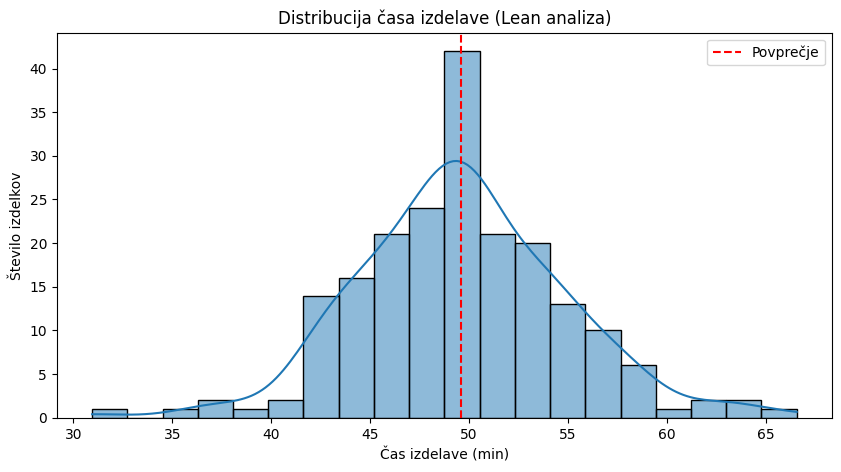

In [19]:
povprecni_cas = data['Cas_izdelave_min'].mean()
print(f"Povprečni čas izdelave: {povprecni_cas:.2f} min")

plt.figure(figsize=(10,5))
sns.histplot(data['Cas_izdelave_min'], bins=20, kde=True)
plt.axvline(povprecni_cas, color='red', linestyle='--', label='Povprečje')
plt.title("Distribucija časa izdelave (Lean analiza)")
plt.xlabel("Čas izdelave (min)")
plt.ylabel("Število izdelkov")
plt.legend()
plt.show()



Šest Sigma je metoda za določanje, kako naj menedžerji postavljajo in dosegajo cilje. Demonstrira, kako lahko dosežemo vrhunske izboljšave hkrati z občutnimi prihranki. Metodologija Šest Sigma gre preko procesa in orodij izboljšav, ker zahteva inteligentno uporabo podatkov; poudarek je na statistični analizi in načrtovanju eksperimentov. Šest Sigma ponuja proces izboljšav skozi DMAIC metodologijo:

Define – definiraj izboljšavo projektnih ciljev, cilji bazirajo na potrebah in željah kupca.
Measure – meri trenutni proces in postavi merila za spremljanje doseganja ciljev.
Analyze – analiziraj trenutni proces, da razumemo probleme in njihove vzroke.
Improve – izboljšaj proces z identificiranjem in oblikovanjem rešitev problemov.
Control – kontroliraj izboljšane procese s standardizacijo in nenehnim spremljanjem.

https://ecg.si/clanki/sest-sigma-six-sigma/

Faza Measure: Povprečni čas izdelave = 49.61 min
Faza Measure: Število napak = 15
Faza Measure: DPMO = 75000



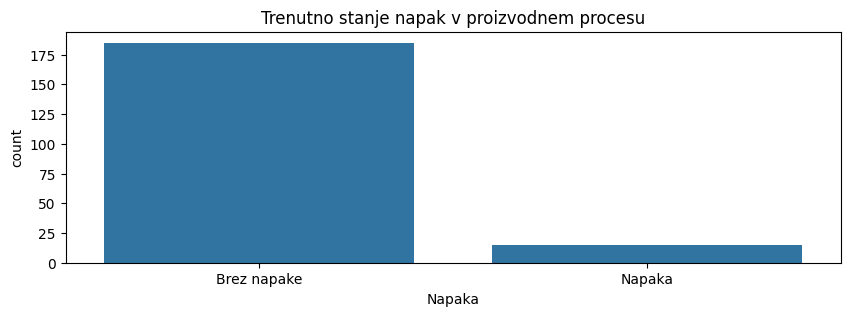

Faza Analyze: Korelacija med časom izdelave in napako = 0.17
Če je korelacija pozitivna, daljši čas izdelave povečuje možnost napake.

Faza Improve: Po izboljšavi (čas <= 60 min)
Število napak = 13
DPMO = 67010



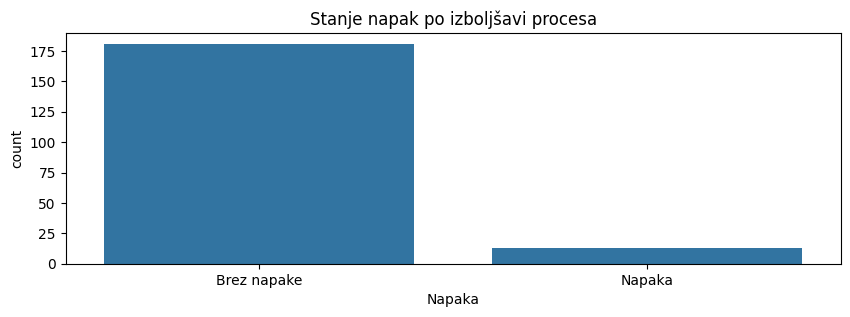

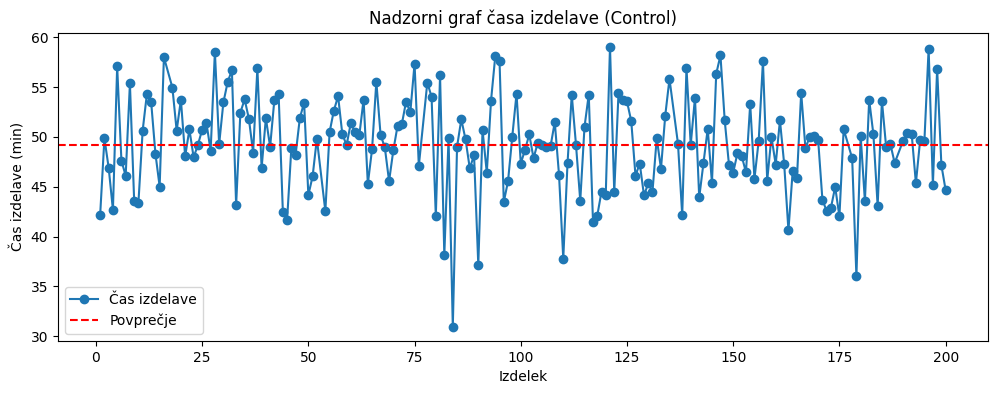

In [20]:
napake = data['Napaka'].sum()
dpmo = (napake / n) * 1_000_000

print(f"Faza Measure: Povprečni čas izdelave = {povprecni_cas:.2f} min")
print(f"Faza Measure: Število napak = {napake}")
print(f"Faza Measure: DPMO = {dpmo:.0f}\n")

plt.figure(figsize=(10,3))
sns.countplot(x='Napaka', data=data)
plt.xticks([0,1], ['Brez napake','Napaka'])
plt.title("Trenutno stanje napak v proizvodnem procesu")
plt.show()

kor = data['Cas_izdelave_min'].corr(data['Napaka'])
print(f"Faza Analyze: Korelacija med časom izdelave in napako = {kor:.2f}")
print("Korelacija je negativna->, krajsi čas izdelave povečuje možnost napake.\n")

improved_data = data[data['Cas_izdelave_min'] <= 60].copy()
napake_nove = improved_data['Napaka'].sum()
dpmo_nove = (napake_nove / len(improved_data)) * 1_000_000

print(f"Faza Improve: Po izboljšavi (čas <= 60 min)")
print(f"Število napak = {napake_nove}")
print(f"DPMO = {dpmo_nove:.0f}\n")
plt.figure(figsize=(10,3))
sns.countplot(x='Napaka', data=improved_data)
plt.xticks([0,1], ['Brez napake','Napaka'])
plt.title("Stanje napak po izboljšavi procesa")
plt.show()



plt.figure(figsize=(12,4))
plt.plot(improved_data['Izdelek'], improved_data['Cas_izdelave_min'], marker='o', linestyle='-', label='Čas izdelave')
plt.axhline(improved_data['Cas_izdelave_min'].mean(), color='red', linestyle='--', label='Povprečje')
plt.title("Nadzorni graf časa izdelave (Control)")
plt.xlabel("Izdelek")
plt.ylabel("Čas izdelave (min)")
plt.legend()
plt.show()